# Statistical Analysis of Brain Size, IQ, Gender, Weight, and Height

The purpose of this notebook is to practice some plotting functions from pandas as well as perform some statistical tests using python. Let's load some libraries

In [26]:
import pandas as pd

Let's load the data set we are going to be using for practice. The data set I will be exploring contains information on brain size, IQ score, height, and weight for different subject with different genders.

In [62]:
BrainData=pd.read_csv("brain_size.csv", sep=";", na_values=".")
BrainData.head(10)

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


What do some of these features mean?

Unnamed: 0- A dummy index we will remove later
Gender- The gender of the subject
FSIQ, VIQ, PIQ- Different IQ measurements.
Weight- The weight of the subject in pounds.
Height- The height of the subject in inches.
MRI_Count- The number of pixels in an MRI scan of someone's brain.

Here we have specified that missing values in this CSV are marked by a period. Pandas converts these missing values to NaNs, which pandas and most python packages are capable of dealing with. It is important that these missing values are listed as NaNs rather than other characters.

What are some other attributes of the dataset?

In [28]:
print("The number of patients in the dataset: ", BrainData.shape[0])
print("The genders in the dataset: ",BrainData["Gender"].unique())

BrainData.describe()

The number of patients in the dataset:  40
The genders in the dataset:  ['Female' 'Male']


,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


The dataset has 40 patients in it. There are two missing values for weights and one missing value for height. The means and standard deviations of the three IQ tests are fairly close together. 

### Question 1) Does the data indicate that male's and female's are different in any way?

For this analysis, we can split the dataframe into two parts: males and females

In [31]:
#Drop the dummy index column
NewBrainData=BrainData.drop("Unnamed: 0",axis=1)

#Split the data among males and females
Males=NewBrainData[NewBrainData["Gender"]=="Male"]
Females=NewBrainData[NewBrainData["Gender"]=="Female"]

#Print some basic statistics for men and women
print("Some basic statistics for males: \n",Males.describe(),"\n")
print("Some basic statistics for females: \n",Females.describe())


Some basic statistics for males: 
              FSIQ         VIQ         PIQ      Weight     Height     MRI_Count
count   20.000000   20.000000   20.000000   18.000000  19.000000  2.000000e+01
mean   115.000000  115.250000  111.600000  166.444444  71.431579  9.548554e+05
std     24.986312   25.640993   23.540335   20.047656   3.283131  5.591135e+04
min     80.000000   77.000000   74.000000  132.000000  66.300000  8.799870e+05
25%     89.750000   95.250000   86.000000  148.750000  68.900000  9.195292e+05
50%    118.000000  110.500000  117.000000  172.000000  70.500000  9.472415e+05
75%    139.250000  145.000000  128.000000  180.750000  73.750000  9.734960e+05
max    144.000000  150.000000  150.000000  192.000000  77.000000  1.079549e+06 

Some basic statistics for females: 
              FSIQ         VIQ         PIQ      Weight     Height     MRI_Count
count   20.000000   20.000000   20.000000   20.000000  20.000000      20.00000
mean   111.900000  109.450000  110.450000  137.200000  65

The mean for the FSIQ, VIQ, PIQ, as well as the Weight and Height of males appear to bve higher. But given the small dataset (20 patients of each gender), are these differences statisticallyn significant? Do the observed differences in the sample correspond to actual differences in the whole population? To answer this question, we must perform a statistical test.

I will test six hypotheses here versus null hypotheses:
- Alternative Hypothesis 1: The mean of FSIQ for men and women are different in the population.
- Alternative Hypothesis 2: The mean of VIQ for men and women are different in the population.
- Alternative Hypothesis 3: The mean of PIQ for men and women are different in the population.
- Alternative Hypothesis 4: The mean of Weight for men and women are different in the population.
- Alternative Hypothesis 5: The mean of Height for men and women are different in the population.
- Alternative Hypothesis 6: The mean of MRI_Count for men and women are different in the population.

The null hypothesis is that there is no difference between men and women here.

Here are some plots to explore the dataset even further:

Female         AxesSubplot(0.1,0.15;0.363636x0.75)
Male      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

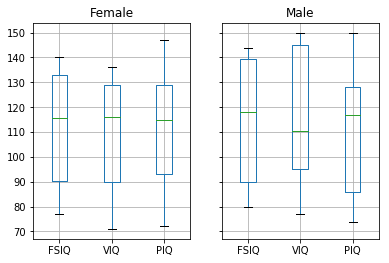

In [63]:
#Create a groupby object in pandas
groupby_gender=BrainData.groupby("Gender")
groupby_gender.boxplot(column=["FSIQ","VIQ","PIQ"])

The green lines in this plot indicate the median of the each of the FSIQ, VIQ, PIQ. It actually does not appear that there is a significant difference between the two genders based on their boxplots, but we will perform a statistical analyses anyways on the IQs. What about the height and weights?

Female         AxesSubplot(0.1,0.15;0.363636x0.75)
Male      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

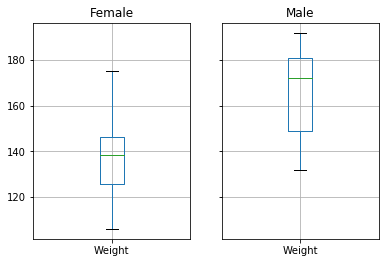

In [38]:
groupby_gender.boxplot(column=["Weight"])

Female         AxesSubplot(0.1,0.15;0.363636x0.75)
Male      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

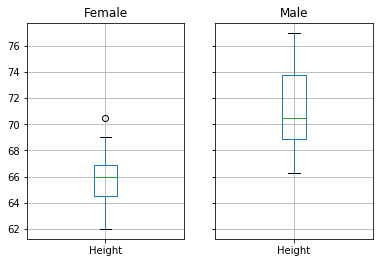

In [39]:
groupby_gender.boxplot(column=["Height"])

In contrast to IQ, there does seem to statistically significant difference in the height and weights of men and women. What about the number of pixels in the subjects MRI scan of their brain (a crude approximation of their brain size)? 

Female         AxesSubplot(0.1,0.15;0.363636x0.75)
Male      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

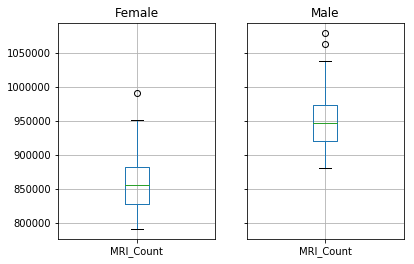

In [65]:
groupby_gender.boxplot(column=["MRI_Count"])

There does seem to be a difference in the size of the brains of men and women. Ok, now lets perform the statistical tests to confirm if these differences are statistically significant.

In [45]:
#For simple statistical tests, we can use the scipy module
from scipy import stats

print("Let's test if there is any statistical meaning to IQ differences between males and females")
print("VIQ: ",stats.ttest_ind(Males["VIQ"],Females["VIQ"]),"\n")
print("FSIQ: ",stats.ttest_ind(Males["FSIQ"],Females["FSIQ"]),"\n")
print("PIQ: ",stats.ttest_ind(Males["PIQ"],Females["PIQ"]),"\n")

Let's test if there is any statistical meaning to IQ differences between males and females
VIQ:  Ttest_indResult(statistic=0.7726161723275011, pvalue=0.44452876778583217) 

FSIQ:  Ttest_indResult(statistic=0.4026724743703011, pvalue=0.6894456253897778) 

PIQ:  Ttest_indResult(statistic=0.15980113150762698, pvalue=0.8738841403250049) 



Note that the p-values of all of these comparisons are high. In the first case the probability that we can accept the null hypothesis as true (that VIQ is equal for males and females) is 0.444. This roughly means that there is high probability of simply generating the observed data from chance alone. We cannot reject the null hypothesis in this case for any of the IQ measurements.

What about the height and weights?

In [66]:
print("Let's test if there is any statistical meaning to Height and Weight differences")
print("Weight: ",stats.ttest_ind(Males["Weight"].dropna(),Females["Weight"]),"\n")
print("Height: ",stats.ttest_ind(Males["Height"].dropna(),Females["Height"]),"\n")
print("MRI_Count: ",stats.ttest_ind(Males["MRI_Count"].dropna(),Females["MRI_Count"]),"\n")

Let's test if there is any statistical meaning to Height and Weight differences
Weight:  Ttest_indResult(statistic=4.870950921940696, pvalue=2.227293018362118e-05) 

Height:  Ttest_indResult(statistic=6.280184459523685, pvalue=2.623667704653113e-07) 

MRI_Count:  Ttest_indResult(statistic=5.215594290396395, pvalue=6.757994867071175e-06) 



In this case, the p-values for height, weight, and brain size indicate that there is a very low probability that the observed differences in the means between the men and women are due to chance alone. This means that we can reject the null hypothesis that states that the means of the height, weight, and brain size are equal between men and women.

### Question 2: Is there any meaningful difference between the three IQ tests?

Before trying to answer this question, lets make a plot of each of the IQ tests vs. each other. Pandas has a built-in plotting method to deal with this.

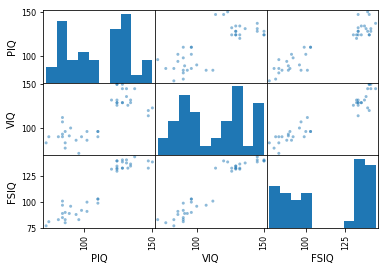

In [53]:
from pandas.plotting import scatter_matrix

# Scatter matrices for different columns
scatter_matrix(BrainData[['PIQ', 'VIQ', 'FSIQ']])

import matplotlib.pyplot as plt
plt.show()

We can perform a paired test to see if the FISQ, PIQ, VIQ come from the same distributions.

- Alternative Hypothesis 1: the mean difference between FISQ and PIQ is non-zero
- Alternative Hypothesis 2: the mean difference between FISQ and VIQ is non-zero
- Alternative Hypothesis 3: the mean difference between PIQ and VIQ is non-zero

Null Hypothesis: the average difference between any two IQ measurements in zero.

Let's perform statistical tests on these sets of paired data.

In [59]:
print("FSIQ and PIQ: \n",stats.ttest_rel(BrainData['FSIQ'], BrainData['PIQ']),"\n")
print("FSIQ and VIQ: \n",stats.ttest_rel(BrainData['FSIQ'], BrainData['VIQ']),"\n")
print("PIQ and VIQ: \n",stats.ttest_rel(BrainData['PIQ'], BrainData['VIQ']),"\n")

FSIQ and PIQ: 
 Ttest_relResult(statistic=1.7842019405859857, pvalue=0.08217263818364236) 

FSIQ and VIQ: 
 Ttest_relResult(statistic=0.8913911665594247, pvalue=0.37818604189634275) 

PIQ and VIQ: 
 Ttest_relResult(statistic=-0.5445841763599564, pvalue=0.5891401178507841) 



So far we have performed two kinds of statistical tests:
1) Comparison of means on independent data (i.e. two groups)
2) Comparison of differences between paired data (i.e. multiple measurements for each specimen).

The above p-values for paired data indicate that there is only a 0.082 probability that the FSIQ and PIQ have a mean difference of zero in the actual population. 

### Question 3: Is there any relationship between brain size and IQ scores?

Based on the previous two sections, there probably is not a strong relationship between brain size and IQ score, but we should still check for completeness.

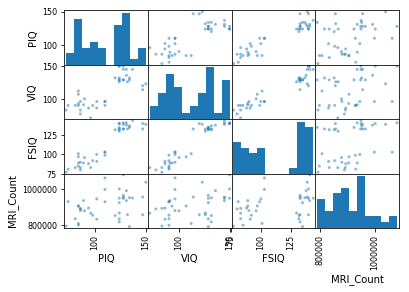

In [67]:
# Scatter matrices for IQ and MRI_Count
scatter_matrix(BrainData[['PIQ', 'VIQ', 'FSIQ','MRI_Count']])

import matplotlib.pyplot as plt
plt.show()

As we can see, the MRI_Count does not appear to have a strong relationship with any of the IQ tests. In order to test if these two variables are related, we can perform two statistical tests: Pearson's correlation and Spearman's rank correlation.

Let's start with Pearson's correlation, which tests to see if the two variables have a linear relationship. 

- Alternative Hypothesis 1: MRI_Count and PIQ have a linear relationship
- Alternative Hypothesis 2: MRI_Count and VIQ have a linear relationship
- Alternative Hypothesis 3: MRI_Count and FSIQ have a linear relationship

Null Hypothesis: None of these variables have linear relationships

In [71]:
from scipy.stats import pearsonr

corr, p = pearsonr(BrainData['MRI_Count'], BrainData['PIQ'])
print("MRI_Count, PIQ: p-value ",p,", correlation ",corr)
corr, p = pearsonr(BrainData['MRI_Count'], BrainData['VIQ'])
print("MRI_Count, VIQ: p-value ",p,", correlation ",corr)
corr, p = pearsonr(BrainData['MRI_Count'], BrainData['FSIQ'])
print("MRI_Count, FSIQ: p-value ",p,", correlation ",corr)

MRI_Count, PIQ: p-value  0.013674636036073246 , correlation  0.3868173150245029
MRI_Count, VIQ: p-value  0.033201762692926864 , correlation  0.33747772802033543
MRI_Count, FSIQ: p-value  0.023468912626901678 , correlation  0.3576409693690567


Interestingly, we have low p-values, indicating that brain size and IQ may have a linear relationship. What does the Spearman rank correlation say?

In [72]:
from scipy.stats import spearmanr

corr, p = spearmanr(BrainData['MRI_Count'], BrainData['PIQ'])
print("MRI_Count, PIQ: p-value ",p,", correlation ",corr)
corr, p = spearmanr(BrainData['MRI_Count'], BrainData['VIQ'])
print("MRI_Count, VIQ: p-value ",p,", correlation ",corr)
corr, p = spearmanr(BrainData['MRI_Count'], BrainData['FSIQ'])
print("MRI_Count, FSIQ: p-value ",p,", correlation ",corr)

MRI_Count, PIQ: p-value  0.008173533949126888 , correlation  0.41246146706792225
MRI_Count, VIQ: p-value  0.010586483605577596 , correlation  0.3998136785192377
MRI_Count, FSIQ: p-value  0.0020984777996441214 , correlation  0.47214191583899207


Interestingly, these tests indicate that there is some correlations between brain size and IQ score. However, we were not able to show any difference in IQ scores based on gender, but we were able to show that brain size has a relationship with gender. This may indicate the presence of some confounding variables.